- CategoricalNB implementa a versão para dados categóricos. Ele assume que cada atributo, que é descrito pelo índice $i$, tem sua própria distribuição categórica.

- Para cada atributo $i$ no conjunto de treinamento $X$, CategoricalNB estima uma distribuição categórica de $i$ de $X$ condicionada à classe $y$. O conjunto de índices das amostras é definido como $J=\{1,2,\dots,m\}$, sendo $m$ o total de amostras.

- A probabilidade da categoria $t$ aparecer no atribto $i$ dada a classe $c$ é estimada como: $P(x_{i=t}|y=c; \alpha)=\frac{N_{tic} + \alpha }{N_c + \alpha n_i}$, onde $N_{tic}$ é a quantidade de vezes que a categoria $t$ está presente na feature $x_i$, $N_c$ é a quantidade de amostras da classe $c$, $\alpha$ parametro de suavização, $n_i$ a quantidade de categorias disponíveis da feature $x_i$.

- CategoricalNB presupõe que as features estão codificadas em vetores de números inteiros começando a partir de zero.

In [ ]:
# import numpy as np
# import pandas as pd

In [ ]:
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data -O car.csv

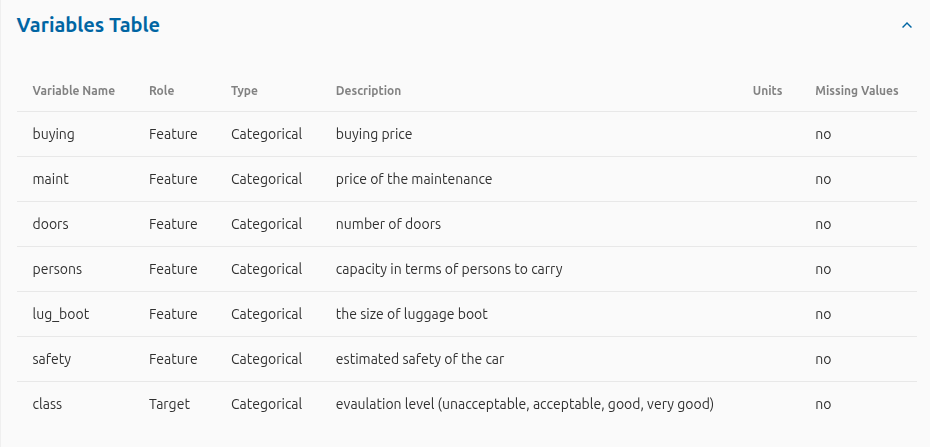

In [ ]:
# features = ['buying', 'maint','doors','persons','lug_boot', 'safety']
# classes = ['class']
# df = pd.read_csv('....', names=features+classes, sep=',' )
# df

# # class values: unacc, acc, good, vgood
# # attributes:
# #             buying:   vhigh, high, med, low.
# #             maint:    vhigh, high, med, low.
# #             doors:    2, 3, 4, 5more.
# #             persons:  2, 4, more.
# #             lug_boot: small, med, big.
# #             safety:   low, med, high.

In [ ]:
# df.describe()

In [ ]:
# df.dtypes

Verificar se existem NaN ou None

In [ ]:
# df.isna().sum()

Distribuição dos rótulos $P(y_i)$

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure()
# histograma = plt.hist( df['class'] ) # histogram
# plt.show()

Contagem dos valores das features, util para identificar se algum valor é raro ou inexistente

In [ ]:
# def count_individual_feattures(df, columns):
#     for var in columns:
#       print(df[var].value_counts(), '\n' )

# count_individual_feattures(df, features)

Verificação das contagens por classes

$P(x_j|y_i)$

In [ ]:
# import seaborn as sns

# def count_plot(df, columns):
#     plt.figure(figsize=(15,5))
#     for indx, var in enumerate(columns):
#         plt.subplot(2,3,indx+1)
#         sns.countplot(x=var, hue=df['class'], data=df)
#     plt.tight_layout()


# count_plot(df, features)

Antes de aplicar o classificador devemos transformar os valores string em números inteiros usando o OrdinalEncoder

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder

# ordinal_encoder = OrdinalEncoder()
# X = ordinal_encoder.fit_transform(df[features])

# print(X)

# print(ordinal_encoder.categories_)

In [ ]:
X.shape

Verificando independência entre atributos

Em Teoria da Informação, a informação mútua (em inglês Mutual information - MI) de duas variáveis aleatórias é a medida da dependência mútua entre as duas variáveis.

In [ ]:
# from sklearn.metrics import mutual_info_score

# n = X.shape[1]
# for var1 in range(n):
#     for var2 in range(var1+1,n):
#         MI = mutual_info_score(X[:,var1], X[:,var2])
#         print(MI)
#         if MI > 0.1:
#             print(var1, var2)

Converter os rótulos em inteiros entre 0 e n_classes-1.

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(df['class'])

# print(y)
# print(label_encoder.classes_)

Informação mutua das variaves com os rotulos

In [ ]:
# from sklearn.feature_selection import mutual_info_classif

# MI_classes = mutual_info_classif(X, y)
# {feature:MI_classes[i] for i, feature in enumerate(features)}

Separação de dados em treino e teste

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=143, stratify=y )

# # depois da separação podemos conferir a distribuição de classes nos dois novos conjuntos
# # a mesma distribuição de rótulos é garantida pelo sklearn
# plt.figure(figsize=(15,4))
# plt.subplot(1,2,1)
# plt.hist(y_train) # histogram
# plt.title('treino')
# plt.xticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_)
# plt.subplot(1,2,2)
# plt.hist(y_test) # histogram
# plt.title('teste')
# plt.xticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_)
# plt.show()

Todas nossas features são categóricas, então uma escolha apropriada seria CategoricalNB()

In [ ]:
# from sklearn.naive_bayes import CategoricalNB # 0,1,2,3

# clf = CategoricalNB( ... )
# clf.fit(..., ....)

In [ ]:
# y_pred_clf = clf.predict(X_test)
# y_prob_pred_clf = clf.predict_proba(X_test)

# # how did our model perform?
# count_misclassified = ( y_test != y_pred_clf).sum()
# print('Misclassified samples: {}'.format(count_misclassified/len(y_pred_clf)))

# print('vetor de features de teste: ',X_test[0,:])
# print('probabilidade das classes: ',y_prob_pred_clf[0,:])
# y_test[0]

In [ ]:
# from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# print( classification_report(y_test, y_pred_clf) )

# # plot_confusion_matrix(clf, X_test, y_test)
# ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
# plt.show()

Comparação contra um classificador que sempre escolhe a classe majoritária

In [ ]:
# from collections import Counter

# c = Counter(y)
# print(c)


# y_maj = np.ones(y_test.shape)*2

# print("Acc: ",sum((y_maj == y_test) / len(y_test)))

In [ ]:
# print( classification_report(y_test, y_maj) )

## Importância das features

Probabilidades $P(x_i|y)$

In [ ]:
# np.exp(clf.feature_log_prob_[3])

In [ ]:
# df_nbf = pd.DataFrame(columns = ['features'] + list(label_encoder.classes_))


# for i, feature in enumerate(features):
#   df_nbf.loc[i,'features'] = feature
#   for j, label in enumerate(label_encoder.classes_):
#     index = np.argmax(np.exp(clf.feature_log_prob_[i][j,:]))
#     df_nbf.loc[i,label] = ordinal_encoder.categories_[i][index]


# df_nbf

Variações do CategoricalNB

Whether to learn class prior probabilities or not. If false, a uniform prior will be used.

In [ ]:
# clf = CategoricalNB(fit_prior=False)
# clf.fit(X_train, y_train)

# y_pred_clf = clf.predict(...) # X_test
# y_prob_pred_clf = clf.predict_proba(....) # X_test

# print( classification_report(y_test, y_pred_clf) )

# # plot_confusion_matrix(clf, X_test, y_test)
# ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
# plt.show()

In [ ]:
# n = len(y_train)

# # acc	good	unacc	vgood

# class_prior = [1-(y_train==0).sum()/n, 1-(y_train==1).sum()/n, 1-(y_train==2).sum()/n, 1-(y_train==3).sum()/n]
# class_prior

In [ ]:
# clf = CategoricalNB(class_prior=class_prior)
# clf.fit(X_train, y_train)

# y_pred_clf = clf.predict(X_test)
# y_prob_pred_clf = clf.predict_proba(X_test)

# print( classification_report(y_test, y_pred_clf) )

# ConfusionMatrixDisplay.from_estimator(..., ...., ...) # clf, X_test, y_test
# plt.show()

Comparando antes e depois dos priors. Observamos que as classes menos representadas ganharam um aumento das métricas, e as classes mais representadas perderam.

In [ ]:
# print('no priors','with priors')
# print(0.74, '\t', 0.65, '\t perdeu')
# print(0.26, '\t', 0.43, '\t ganhou')
# print(0.96, '\t', 0.80, '\t perdeu')
# print(0.45, '\t', 0.51, '\t ganhou')